<h1>Part 1<h1>

<h3>AC Voltage Source<h3>

In [1]:
from vpython import*
import numpy as np
import math
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

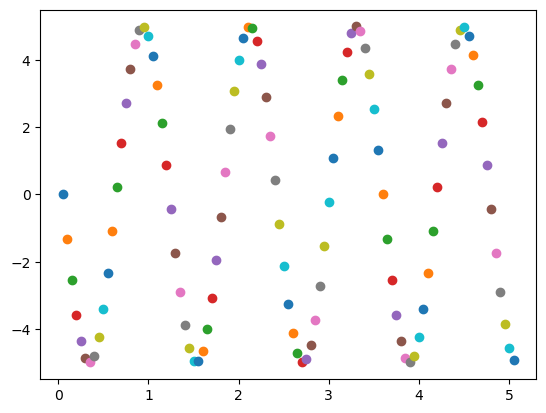

In [2]:
dt = .05
tt = 0
A = 5
freq = 1000
while tt<5:
    voltage = A * sin(freq * tt)
    tt += dt
    plt.scatter(tt, voltage)
    
plt.show()

<h3>RC Filter<h3>

In [3]:
scene1 = canvas()

<IPython.core.display.Javascript object>

In [4]:
tgraph=graph(title="RC Circuit", xtitle="total time",ytitle="Capacitor Voltage",
width=600,height=450)
f1=gcurve(color=color.blue)
f2=gcurve(color=color.green)

V=5
R=100
C=0.0001
Q=0

tt=0
dt=0.00001
A = 5
freq = 1000

while tt<.05:
    V = A * sin(freq * tt)
    dQ=dt*(V-Q/C)/R
    Q=Q+dQ
    tt=tt+dt
    Vc=Q/C
    f1.plot(tt,Vc)
    f2.plot(tt,V)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h3>Verification<h3>

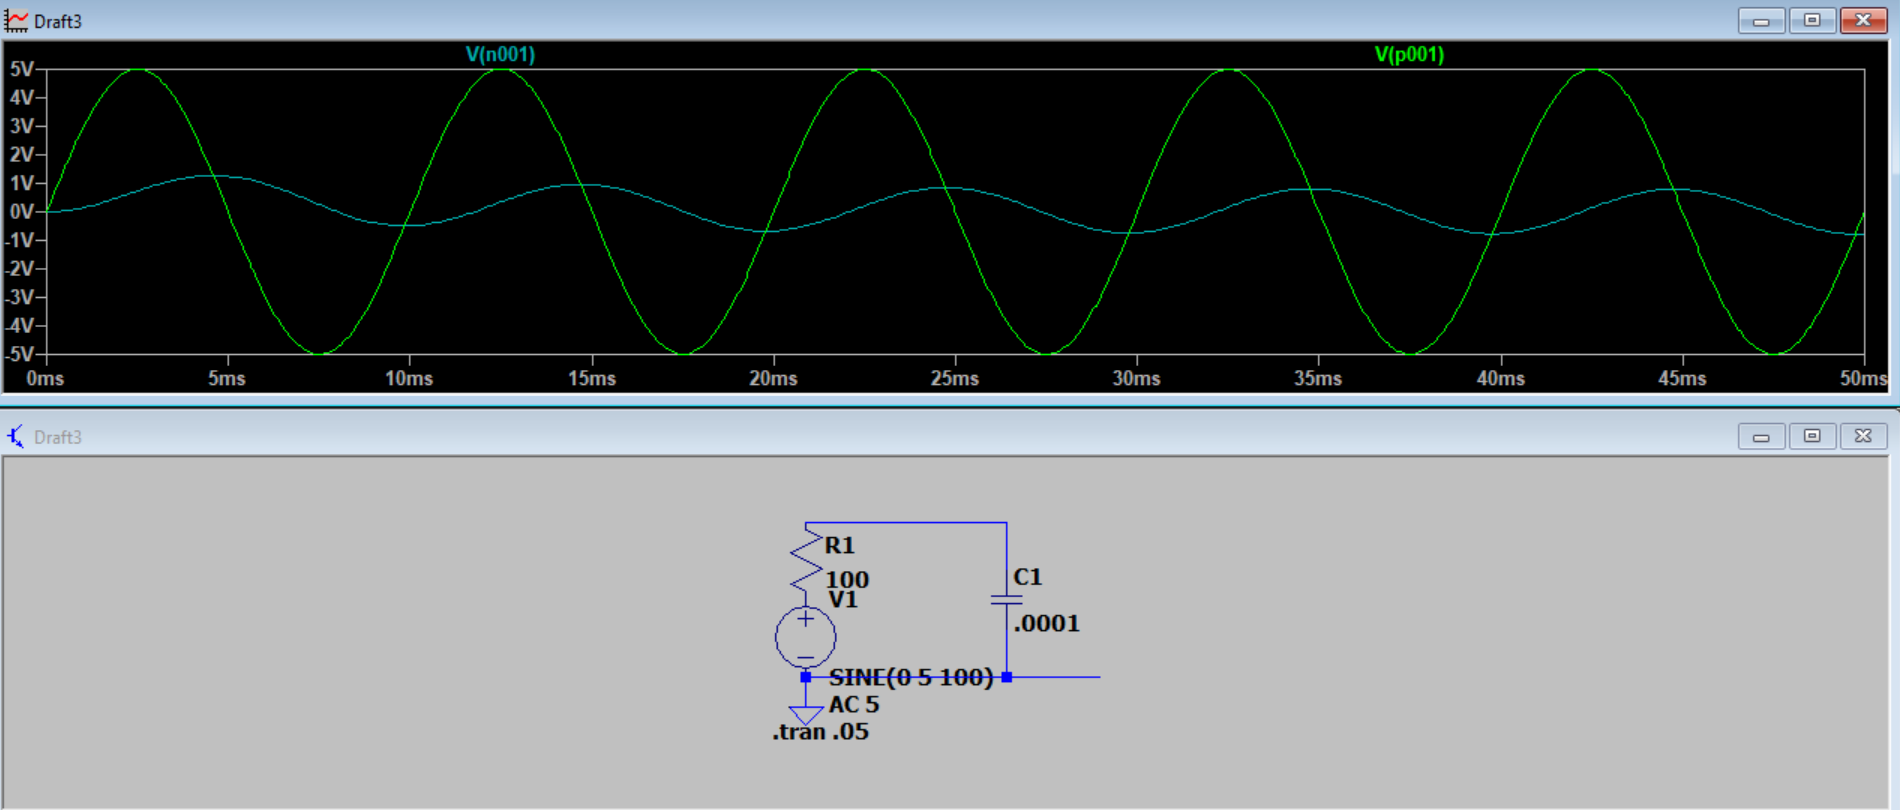

Although there are issues in the difference between the period of sine waves produced by the two algorithm (due to differences in calculations) we can see the behavior of the 2 circuits is identicle, with the maximum amplitude for the voltage of the capacitor being between +/- .5V and 1V. The two functions also intersect as the same points along the sine waves in both the simulation and the Spice Model.

I chose 5V and 100Ohms because they are classically chosen values. I had to use trial and error to determine a capacitance value that showed significant results. I also needed a much shorter amount of total time than I expected, or otherwise the sine wave has too small of a period with this frequency. This also made me reduce my time step significantly to smooth the curve.

<h3>References<h3>

https://www.electrical4u.com/rc-circuit-analysis/

https://www.youtube.com/watch?v=yNIdIRWRQIQ&t=562s

https://www.youtube.com/watch?v=lagfhNjMuQM

<h1>Part 2<h1>

In [8]:
scene2 = canvas()

<IPython.core.display.Javascript object>

In [9]:
tgraph=graph(title="RC Circuit", xtitle="total time",ytitle="Capacitor Voltage", width=600,height=450)
f1=gcurve(color=color.blue)
f2=gcurve(color=color.green)

V=5
R=100
C=0.0001
Q=0

V1 = 0
V2 = 0
Vt = .026
Ivi = 0
Is = 1e-9

tt=0
dt=0.00005
dtc=0.00005
Amp = 5
freq = 1000
while tt<.05:
    #Voltage
    V = Amp * sin(freq * tt)
    Vd = V2 - V1
    
    Ic = -1*C/dt*V2
    Gd = Is/(Vt)*math.exp(Vd/(Vt))
    Id = Is*(math.exp(Vd/(Vt))-1)
    Idq = Id-Gd*Vd
    
    # solve Matrix
    Gd2 = -Gd-1/R-C/dt
    Idq2 = Ic - Idq
    A = np.matrix([ [-Gd, Gd, 1], [Gd, Gd2, 0], [1, 0, 0] ])
    b = np.matrix([ [Idq], [Idq2], [V] ])
    x = np.linalg.solve(A, b)
    
    V1 = x.item(0)
    V2 = x.item(1)
    Ivi = x.item(2)
    
    # Compare w Next Voltage
    if(abs((V2-V1) - (Vd)) >= .05):
        
        if(dtc >= dt/10):
            dtc -= dt/10
        else:
            tt += dtc
            dtc = dt
    else:
        tt += dtc
        dtc = dt
        
    f1.plot(tt, -1*(V2))
    f2.plot(tt+.003, V)

<h3>Verification<h3>

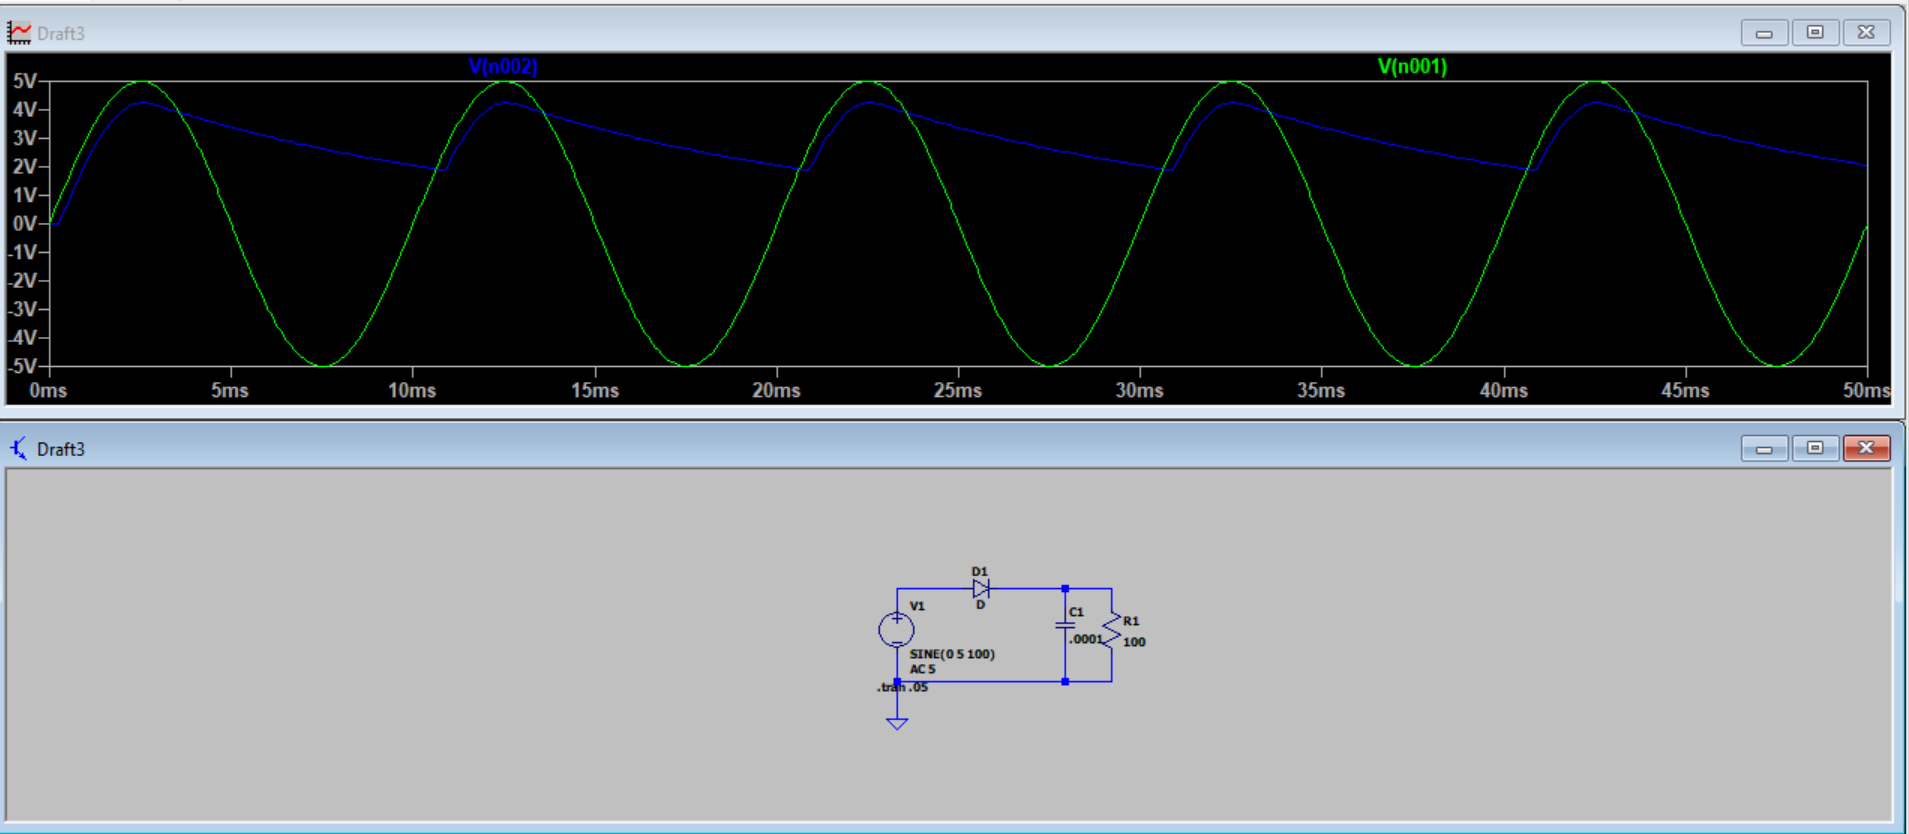

I did need to add a small phase shift to have the waves aligned as they are in LTSpice, but I believe that is an issue with how time is iterated over in a loop such as this. Besides that I think the value I chose accurately represented my diode of choice in LTSpice. I did have the same issue with the frequency not matching, so the frequency values are different. I also had to change the timestep, due to run time issues. The initial value I had for it was the same as the first simulation, but I decided to divide that initially. When that didn't work I reset that value to what it had been, and adjusted the convergence value instead. Upon doing this my graphs improved significantly, as well as the run time.

<h3>References<h3>

https://electronics.stackexchange.com/questions/309344/derivation-of-ripple-voltage-formula-for-simple-half-wave-rectifier#:~:text=A%20half%20wave%20rectifier%20will%20recharge%20your%20cap,on%20every%20period%2C%20so%20you%20have%20your%20answer.

https://www.bing.com/videos/search?q=find+charge+of+capacitor+in+halfwave+rectifier&docid=603513823615782495&mid=E1E9AF0BD27D97090805E1E9AF0BD27D97090805&view=detail&FORM=VIRE